Rozkład klas przed balansowaniem:
0    255
1    245
Name: count, dtype: int64
Proporcje: 0    0.51
1    0.49
Name: proportion, dtype: float64

KLASYFIKACJA BEZ BALANSOWANIA

Logistic Regression:
Dokładność: 0.9933

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.98      1.00      0.99        63

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Macierz pomyłek:
[[86  1]
 [ 0 63]]

Decision Tree:
Dokładność: 0.9533

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        87
           1       0.95      0.94      0.94        63

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Macierz pomyłek:


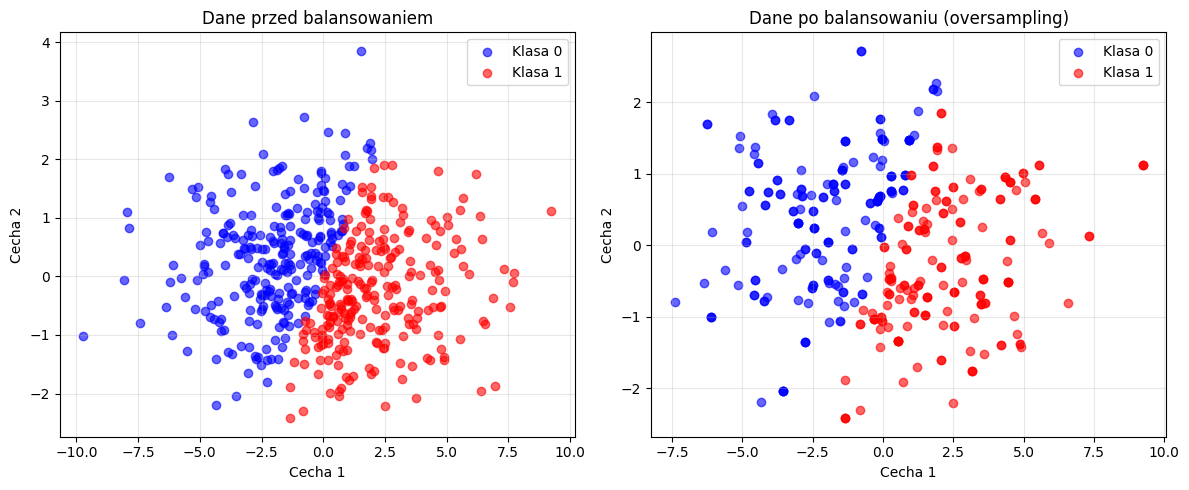


PODSUMOWANIE - PORÓWNANIE WYNIKÓW

Dokładność modeli:
                     Bez balansowania  Undersampling  Oversampling
Logistic Regression          0.993333       0.986667      0.986667
Decision Tree                0.953333       0.953333      0.953333
Random Forest                0.973333       0.960000      0.960000
SVM                          0.986667       0.980000      0.986667


<Figure size 1200x600 with 0 Axes>

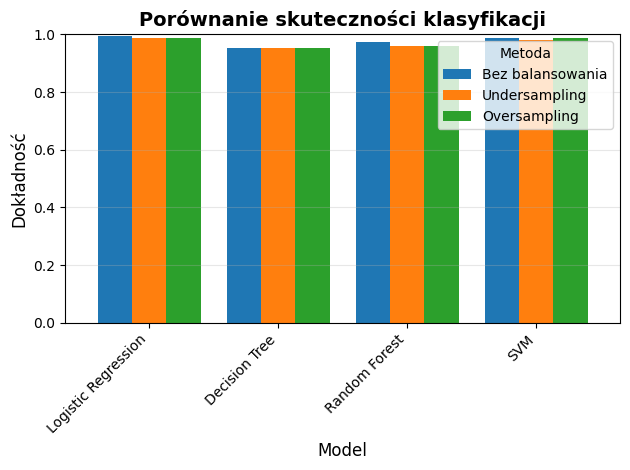


WNIOSKI

1. Balansowanie klas może znacząco wpłynąć na wydajność modeli klasyfikacji
2. Undersampling redukuje dane, co może prowadzić do utraty informacji
3. Oversampling zwiększa dane, ale może prowadzić do przeuczenia
4. Wybór metody balansowania zależy od specyfiki problemu i rozmiaru danych
5. Należy zawsze testować na niezależnym zbiorze testowym



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns


#wariant 9
np.random.seed(42)

X = np.random.randn(500, 2) * [3, 1]
y = (X[:, 0] > X[:, 1]).astype(int)

print("Rozkład klas przed balansowaniem:")
print(pd.Series(y).value_counts())
print(f"Proporcje: {pd.Series(y).value_counts(normalize=True)}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Klasa 0', alpha=0.6)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Klasa 1', alpha=0.6)
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('Dane przed balansowaniem')
plt.legend()
plt.grid(True, alpha=0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n" + "="*60)
print("KLASYFIKACJA BEZ BALANSOWANIA")
print("="*60)

def train_and_evaluate(X_train, y_train, X_test, y_test, title=""):
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
        'SVM': SVC(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        
        print(f"\n{name}:")
        print(f"Dokładność: {accuracy:.4f}")
        print("\nRaport klasyfikacji:")
        print(classification_report(y_test, y_pred))
        print("Macierz pomyłek:")
        print(confusion_matrix(y_test, y_pred))
    
    return results

results_unbalanced = train_and_evaluate(X_train, y_train, X_test, y_test, "Bez balansowania")

print("\n" + "="*60)
print("BALANSOWANIE DANYCH")
print("="*60)

print("\nMetoda 1: UNDERSAMPLING")
print("-"*60)

df_train = pd.DataFrame(X_train, columns=['X1', 'X2'])
df_train['y'] = y_train

class_0 = df_train[df_train['y'] == 0]
class_1 = df_train[df_train['y'] == 1]

min_class_size = min(len(class_0), len(class_1))

class_0_undersampled = resample(class_0, n_samples=min_class_size, random_state=42)
class_1_undersampled = resample(class_1, n_samples=min_class_size, random_state=42)

df_undersampled = pd.concat([class_0_undersampled, class_1_undersampled])

X_train_under = df_undersampled[['X1', 'X2']].values
y_train_under = df_undersampled['y'].values

print(f"Rozkład po undersampling: {pd.Series(y_train_under).value_counts().to_dict()}")

results_undersampled = train_and_evaluate(X_train_under, y_train_under, X_test, y_test, "Undersampling")

print("\n" + "="*60)
print("Metoda 2: OVERSAMPLING")
print("-"*60)

max_class_size = max(len(class_0), len(class_1))

class_0_oversampled = resample(class_0, n_samples=max_class_size, random_state=42, replace=True)
class_1_oversampled = resample(class_1, n_samples=max_class_size, random_state=42, replace=True)

df_oversampled = pd.concat([class_0_oversampled, class_1_oversampled])

X_train_over = df_oversampled[['X1', 'X2']].values
y_train_over = df_oversampled['y'].values

print(f"Rozkład po oversampling: {pd.Series(y_train_over).value_counts().to_dict()}")

results_oversampled = train_and_evaluate(X_train_over, y_train_over, X_test, y_test, "Oversampling")

plt.subplot(1, 2, 2)
plt.scatter(X_train_over[y_train_over==0, 0], X_train_over[y_train_over==0, 1], 
            c='blue', label='Klasa 0', alpha=0.6)
plt.scatter(X_train_over[y_train_over==1, 0], X_train_over[y_train_over==1, 1], 
            c='red', label='Klasa 1', alpha=0.6)
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('Dane po balansowaniu (oversampling)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("PODSUMOWANIE - PORÓWNANIE WYNIKÓW")
print("="*60)

comparison_df = pd.DataFrame({
    'Bez balansowania': results_unbalanced,
    'Undersampling': results_undersampled,
    'Oversampling': results_oversampled
})

print("\nDokładność modeli:")
print(comparison_df)

plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', width=0.8)
plt.title('Porównanie skuteczności klasyfikacji', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Dokładność', fontsize=12)
plt.legend(title='Metoda', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylim([0, 1])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()